In [119]:
import numpy as np
import pandas as pd
import seaborn as sns

In [120]:
df = pd.read_csv("Data_120294_2023-03-29.csv")


/tmp/ipykernel_17326/922264029.py:1: DtypeWarning: Columns (2,64,91,94,97,106,108,109,110,111,112,114,116,119,120,122,127,139,142,143,144,145,152,153,154,155,156,157,159,160,161,163,164,165,169,170,171,172,175,178,179,180,187,189,215,216,217,218,219,317,318) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data_120294_2023-03-29.csv")


## Simple data illustration

In [121]:
# Illustrate the data set with 15 sample rows.
df.sample(15)

,wl_org,cod_wl,cod_ostxt_wl,num_prev_tx,thoracic_dgn,tah,vas,onvent,icu,inotropic,...,imuran_maint,cellcept_ind,cellcept_maint,oth_drug_ind1,oth_drug_maint1,oth_drug_ind2,oth_drug_maint2,oth_drug_ostxt1,oth_drug_ostxt2,_merge
32391,HR,NaN,NaN,0,1000,N,N,N,N,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Master only (1)
6463,HR,NaN,NaN,0,1200,N,N,N,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Master only (1)
45163,HR,NaN,NaN,0,1007,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Matched (3)
93481,HR,NaN,NaN,0,1007,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matched (3)
72829,HR,NaN,NaN,0,1999,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matched (3)
43277,HR,NaN,NaN,0,1000,N,N,N,Y,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matched (3)
42457,HR,NaN,NaN,0,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Master only (1)
96913,HR,NaN,NaN,1,1102,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Matched (3)
118284,HR,NaN,NaN,0,1207,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matched (3)
67552,HR,NaN,NaN,0,1003,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Matched (3)


In [122]:
#Display some basic info about the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120264 entries, 0 to 120263
Columns: 320 entries, wl_org to _merge
dtypes: float64(224), int64(20), object(76)
memory usage: 293.6+ MB


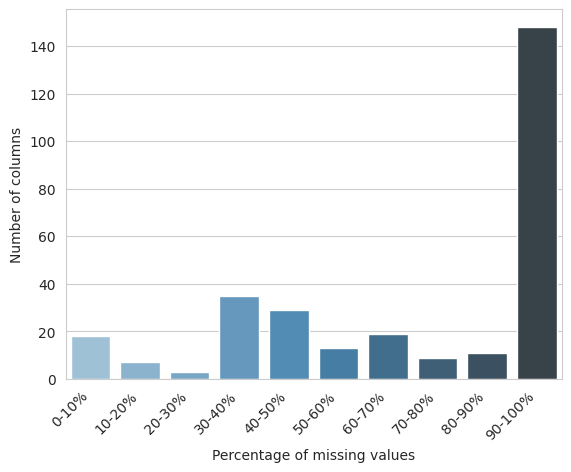

Number of features with more than 50% missing values: 148


In [123]:
#Display percentage of missing values for each feature
df.isnull().sum() / df.shape[0] * 100

# Calculate the percentage of missing values in each column
missing_pct = (df.isnull().sum() / len(df)) * 100

# Define the bin edges and labels
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bin_labels = [f'{i}-{j}%' for i, j in zip(bin_edges[:-1], bin_edges[1:])]

# Bin the columns according to their missing value percentage
bins = pd.cut(missing_pct, bins=bin_edges, labels=bin_labels)

# Count the number of columns in each bin
bin_counts = bins.value_counts().sort_index()

# Create a bar plot of the bin counts
sns.set_style("whitegrid")
ax = sns.barplot(x=bin_counts.index, y=bin_counts.values, palette="Blues_d")
ax.set(xlabel="Percentage of missing values", ylabel="Number of columns")
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the number of features with more than 50% missing values without using bins
print(f"Number of features with more than 50% missing values: {len(missing_pct[missing_pct > 90])}")

## Data preprocessing (cleaning) and data analysis

#### tx_date
Before we start analyzing the data, we remove all rows which do not have tx_date. We are predicting time until transplant, and the rows which do not have a transplant date are therefore irrelevant.

In [124]:
original_size = len(df)

#Print number of rows before removing rows without tx_date
print("Number of rows before removing rows without tx_date: ", original_size)

#Remove all rows without tx_date
df = df[df["tx_date"].notna()]

size_post_cleaning = len(df)
#Print number of rows after removing rows without tx_date
print("Number of rows after removing rows without tx_date: ", size_post_cleaning)

#Print number of removed rows as number
print("Number of removed rows: ", original_size - size_post_cleaning)




Number of rows before removing rows without tx_date:  120264
Number of rows after removing rows without tx_date:  77410
Number of removed rows:  42854


#### Handling of duplicate values

In [125]:
#Display information about the duplicates
df[df.duplicated()]

,wl_org,cod_wl,cod_ostxt_wl,num_prev_tx,thoracic_dgn,tah,vas,onvent,icu,inotropic,...,imuran_maint,cellcept_ind,cellcept_maint,oth_drug_ind1,oth_drug_maint1,oth_drug_ind2,oth_drug_maint2,oth_drug_ostxt1,oth_drug_ostxt2,_merge


In [126]:
#Count number of duplicates
print("Number of duplicates: ", df.duplicated().sum())

#Number of duplicates before dropping
print("Number of rows before dropping duplicates: ", df.shape[0])
#Drop duplicates and keep the first occurence
df = df.drop_duplicates()

#Number of duplicates after dropping
print("Number of rows after dropping duplicates: ", df.shape[0])

Number of duplicates:  0
Number of rows before dropping duplicates:  77410
Number of rows after dropping duplicates:  77410


### Handling and analysis of missing values

In [127]:
#Display percentage of missing values for each feature
df.isnull().sum() / df.shape[0] * 100


wl_org               0.000000
cod_wl             100.000000
cod_ostxt_wl       100.000000
num_prev_tx          0.000000
thoracic_dgn         0.000000
                      ...    
oth_drug_ind2       99.560780
oth_drug_maint2     99.560780
oth_drug_ostxt1     97.482237
oth_drug_ostxt2     99.563364
_merge               0.000000
Length: 320, dtype: float64

#### Wait list time (wl_time) - Y
Creating the value to be predicted, namely wl_time by calculating the difference between init_date and tx_date, and adding it to a column called wl_time. Thereafter they are dropped (maybe they shouldn't be dropped as they can be used as features?). 

In [128]:
df['wl_time'] = (
            pd.to_datetime(df['tx_date'], format='%d%b%Y') - pd.to_datetime(df['init_date'], format='%d%b%Y')).dt.days

# drop init_date and end_date
df = df.drop(['init_date', 'tx_date'], axis=1)

Data visualisation and analysis on wl_time

Number of values less than 10 in wl_time:  9655
78.0


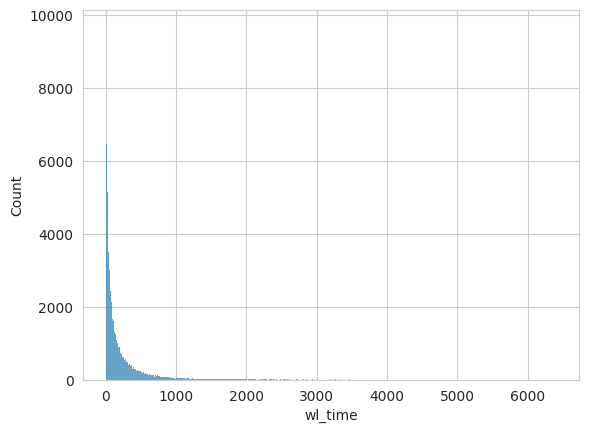

In [129]:
#Display a histogram plot of wl_time using sns
sns.histplot(data=df, x="wl_time")

#print the number of values that are less than 10 in wl_time
print("Number of values less than 10 in wl_time: ", len(df[df['wl_time'] < 10]))

#Print the median of the wl_time
median_wl_time = df['wl_time'].median()
print(median_wl_time)

Number of values that are outliers in wl_time:  7614
Number of values that are not outliers in wl_time:  69796


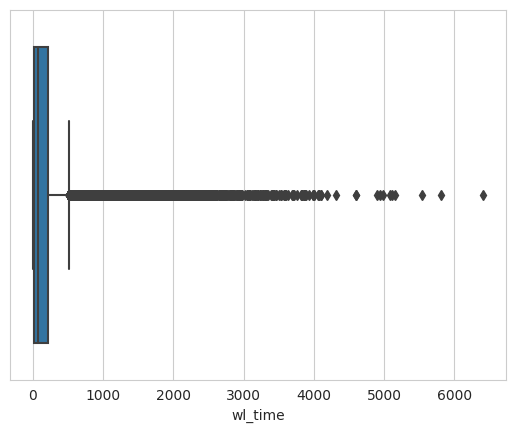

In [130]:
#Display a boxplot of the distribution of the wl_time using sns
sns.boxplot(data=df, x="wl_time")

#Print the number of values that that are outliers, meaning they are bigger than 500
print("Number of values that are outliers in wl_time: ", len(df[df['wl_time'] > 500]))
#Print the number of values that are not outliers, meaning they are between 0 and 500
print("Number of values that are not outliers in wl_time: ", len(df[df['wl_time'] <= 500]))


## Imputing values

In [131]:
#Impute the data using MissForest
from missingpy import knnimpute
from sklearn.neighbors._base import _check_weights
from sklearn.neighbors._base import _get_weights
imputer = MissForest()
df = imputer.fit_transform(df)


# Calculate the percentage of missing values in each column
missing_pct = (df.isnull().sum() / len(df)) * 100

# Define the bin edges and labels
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bin_labels = [f'{i}-{j}%' for i, j in zip(bin_edges[:-1], bin_edges[1:])]

# Bin the columns according to their missing value percentage
bins = pd.cut(missing_pct, bins=bin_edges, labels=bin_labels)

# Count the number of columns in each bin
bin_counts = bins.value_counts().sort_index()

# Create a bar plot of the bin counts
sns.set_style("whitegrid")
ax = sns.barplot(x=bin_counts.index, y=bin_counts.values, palette="Blues_d")
ax.set(xlabel="Percentage of missing values", ylabel="Number of columns")
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the number of features with more than 50% missing values without using bins
print(f"Number of features with more than 50% missing values: {len(missing_pct[missing_pct > 90])}")



ImportError: cannot import name '_check_weights' from 'sklearn.neighbors._base' (/home/maliti/Prog/time-to-transplantation/.conda/lib/python3.10/site-packages/sklearn/neighbors/_base.py)

## Transforming
- Drop redundant columns

## Encode

In [57]:
# encode categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
df["abo"] = le.fit_transform(df["abo"])
df["gender"] = le.fit_transform(df["gender"])

#This should be moved to proper place later
#Calculate median wl_time


# we want to predict if it took more or less than 60 days to get a transplant
df['wl_time'] = df['wl_time'].apply(lambda x: 1 if x > median_wl_time else 0)

#for col in df.columns:
#    if df[col].dtype == 'object':
#        df[col] = le.fit_transform(df[col])

features = ["init_age", "bmi_tcr", "pramr", "prapk", "hemo_pcw_tcr", "hemo_pa_mn_tcr"]
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Impute missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'HR'

## Build model

In [ ]:

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# import ClassificationReport for confusion matrix
from sklearn.metrics import classification_report


assert df.isnull().sum().sum() == 0, "There are still missing values in the dataset"

X_train, X_test, y_train, y_test = train_test_split(df.drop('wl_time', axis=1), df['wl_time'], test_size=0.2,
                                                    random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy:  0.5626729932779755


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
classes = {
    1: "Under 60 days",
    0: "Over 60 days"
}
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes.values())
#disp.plot()

#Calculate F1 score
from sklearn.metrics import f1_score
print("F1 score: ", f1_score(y_test, y_pred))


NameError: name 'y_test' is not defined

<AxesSubplot: >

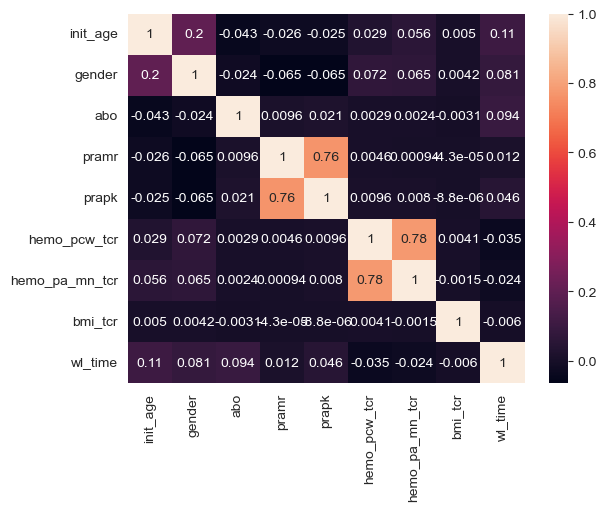

In [ ]:
# import correlation matrix
import seaborn as sns

df.corr()
sns.heatmap(df.corr(), annot=True)


In [ ]:
model = Sequential([
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

# compile the model
#model.compile(loss='mse', optimizer='adam', metrics=['mae'])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/30
3794/3794 [==============================] - 2s 468us/step - loss: 0.6814 - accuracy: 0.5608
Epoch 2/30
3794/3794 [==============================] - 2s 470us/step - loss: 0.6739 - accuracy: 0.5770
Epoch 3/30
3794/3794 [==============================] - 2s 478us/step - loss: 0.6713 - accuracy: 0.5838
Epoch 4/30
3794/3794 [==============================] - 2s 456us/step - loss: 0.6691 - accuracy: 0.5844
Epoch 5/30
3794/3794 [==============================] - 2s 459us/step - loss: 0.6681 - accuracy: 0.5892
Epoch 6/30
1198/3794 [========>.....................] - ETA: 1s - loss: 0.6657 - accuracy: 0.5898

KeyboardInterrupt: 